In [1]:
# LCZ

from shapely.geometry import Point

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 515, 'height': 339, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008983152841195215, 0.0, 7.593459096662316,
       0.0, -0.0008983152841195215, 48.14700428295399), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
(3, 339, 515)
int16


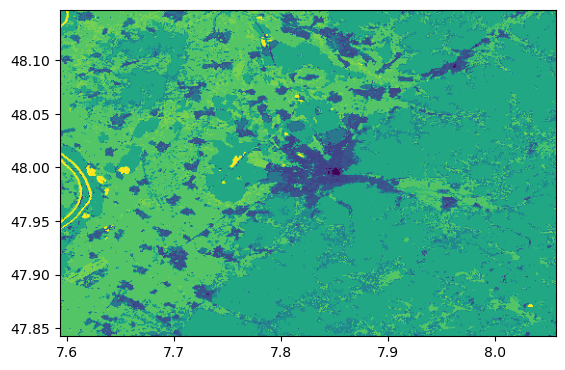

In [15]:
# read tif file into rasterio
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show

# band 1 lcz (Gray), band 2 lczFilter, band 3 class Probability

# read tif file
with rasterio.open('/Users/lisawink/Documents/paper1/data/raw_data/LCZ_Freiburg/545ba6fde79703c477ed6e8a196aefca44ffc6d8 (1)/545ba6fde79703c477ed6e8a196aefca44ffc6d8.tif') as src:
    data = src.read()
    print(src.profile)
    print(data.shape)
    print(data.dtype)
    show(src)

In [3]:
data[0]

array([[14, 11, 11, ..., 11, 11, 11],
       [11, 11,  9, ..., 12, 11, 11],
       [11, 12,  9, ...,  9, 12,  9],
       ...,
       [13, 13, 13, ..., 11, 11,  6],
       [13, 13, 13, ..., 11, 11, 11],
       [13, 14, 13, ..., 11, 11, 11]], dtype=int16)

In [4]:
data[1]

array([[11, 11, 11, ..., 11, 11, 11],
       [11, 11, 11, ..., 12, 11, 11],
       [11, 11, 11, ..., 12, 12, 11],
       ...,
       [13, 13, 13, ..., 11, 11,  6],
       [13, 13, 13, ..., 11, 11, 11],
       [13, 13, 13, ..., 11, 11, 11]], dtype=int16)

In [5]:
data[2]

array([[ 36,  84,  48, ..., 100,  96, 100],
       [100, 100,  48, ...,  48,  52,  96],
       [ 96,  44,  40, ...,  68,  52,  60],
       ...,
       [ 92,  92,  88, ...,  96,  96,  60],
       [ 92,  92,  92, ...,  60,  96,  68],
       [ 52,  68,  72, ...,  60,  56,  84]], dtype=int16)

In [7]:
import pandas as pd

# Data as a list of dictionaries
data = [
    {"LCZ": "LCZ 1", "Description": "Compact highrise", "Color": "#910613"},
    {"LCZ": "LCZ 2", "Description": "Compact midrise", "Color": "#D9081C"},
    {"LCZ": "LCZ 3", "Description": "Compact lowrise", "Color": "#FF0A22"},
    {"LCZ": "LCZ 4", "Description": "Open highrise", "Color": "#C54F1E"},
    {"LCZ": "LCZ 5", "Description": "Open midrise", "Color": "#FF6628"},
    {"LCZ": "LCZ 6", "Description": "Open lowrise", "Color": "#FF985E"},
    {"LCZ": "LCZ 7", "Description": "Lightweight low-rise", "Color": "#FDED3F"},
    {"LCZ": "LCZ 8", "Description": "Large lowrise", "Color": "#BBBBBB"},
    {"LCZ": "LCZ 9", "Description": "Sparsely built", "Color": "#FFCBAB"},
    {"LCZ": "LCZ 10", "Description": "Heavy Industry", "Color": "#565656"},
    {"LCZ": "LCZ 11 (A)", "Description": "Dense trees", "Color": "#006A18"},
    {"LCZ": "LCZ 12 (B)", "Description": "Scattered trees", "Color": "#00A926"},
    {"LCZ": "LCZ 13 (C)", "Description": "Bush, scrub", "Color": "#628432"},
    {"LCZ": "LCZ 14 (D)", "Description": "Low plants", "Color": "#B5DA7F"},
    {"LCZ": "LCZ 15 (E)", "Description": "Bare rock or paved", "Color": "#000000"},
    {"LCZ": "LCZ 16 (F)", "Description": "Bare soil or sand", "Color": "#FCF7B1"},
    {"LCZ": "LCZ 17 (G)", "Description": "Water", "Color": "#656BFA"}
]

# Create DataFrame
df = pd.DataFrame(data)
df['LCZ_number'] = df['LCZ'].str.extract('(\d+)').astype(int)
# Display DataFrame
print(df)

           LCZ           Description    Color
0        LCZ 1      Compact highrise  #910613
1        LCZ 2       Compact midrise  #D9081C
2        LCZ 3       Compact lowrise  #FF0A22
3        LCZ 4         Open highrise  #C54F1E
4        LCZ 5          Open midrise  #FF6628
5        LCZ 6          Open lowrise  #FF985E
6        LCZ 7  Lightweight low-rise  #FDED3F
7        LCZ 8         Large lowrise  #BBBBBB
8        LCZ 9        Sparsely built  #FFCBAB
9       LCZ 10        Heavy Industry  #565656
10  LCZ 11 (A)           Dense trees  #006A18
11  LCZ 12 (B)       Scattered trees  #00A926
12  LCZ 13 (C)           Bush, scrub  #628432
13  LCZ 14 (D)            Low plants  #B5DA7F
14  LCZ 15 (E)    Bare rock or paved  #000000
15  LCZ 16 (F)     Bare soil or sand  #FCF7B1
16  LCZ 17 (G)                 Water  #656BFA


In [8]:
# add column for lcz number 1 to 17
df['LCZ_number'] = df['LCZ'].str.extract('(\d+)').astype(int)
df

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_3750/3832952753.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['LCZ_number'] = df['LCZ'].str.extract('(\d+)').astype(int)


,LCZ,Description,Color,LCZ_number
0,LCZ 1,Compact highrise,#910613,1
1,LCZ 2,Compact midrise,#D9081C,2
2,LCZ 3,Compact lowrise,#FF0A22,3
3,LCZ 4,Open highrise,#C54F1E,4
4,LCZ 5,Open midrise,#FF6628,5
5,LCZ 6,Open lowrise,#FF985E,6
6,LCZ 7,Lightweight low-rise,#FDED3F,7
7,LCZ 8,Large lowrise,#BBBBBB,8
8,LCZ 9,Sparsely built,#FFCBAB,9
9,LCZ 10,Heavy Industry,#565656,10


{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 515, 'height': 339, 'count': 3, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.0008983152841195215, 0.0, 7.593459096662316,
       0.0, -0.0008983152841195215, 48.14700428295399), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
(3, 339, 515)
int16


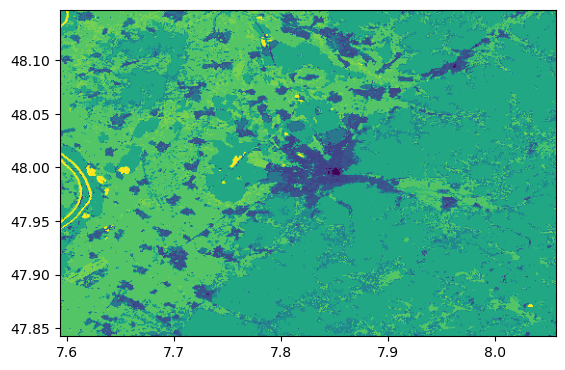

<Axes: >

In [29]:
# convert tif file to geodataframe
import geopandas as gpd

# read tif file

src = rasterio.open('/Users/lisawink/Documents/paper1/data/raw_data/LCZ_Freiburg/545ba6fde79703c477ed6e8a196aefca44ffc6d8 (1)/545ba6fde79703c477ed6e8a196aefca44ffc6d8.tif')
data = src.read()
print(src.profile)
print(data.shape)
print(data.dtype)
show(src)


In [20]:
from shapely.geometry import Point

In [21]:
def make_gdf_stations(stations, radius=100, input_crs='EPSG:4326', output_crs='EPSG:31468', lat_column = 'station_lat', lon_column = 'station_lon'):
        
    geometry = [Point(xy) for xy in zip(stations[lon_column], stations[lat_column])]
    stn_gdf = gpd.GeoDataFrame(stations, crs=input_crs, geometry=geometry)
    stn_gdf = stn_gdf.to_crs(output_crs)
    return stn_gdf

In [19]:
stations = pd.read_csv("/Users/lisawink/Documents/paper1/data/Freiburg-Street-Level-Weather-Station-Network-MetaData-V1-0.csv")

In [25]:
stn_gdf = make_gdf_stations(stations,output_crs='EPSG:4326')

In [26]:
stn_gdf

,station_id,station_no,station_name,station_long_name,station_type,station_lat,station_lon,station_elevation,mounting_structure,sky_view_factor,dominant_land_use,local_climate_zone,urban_atlas_class,urban_atlas_code,geometry
0,FRASHA,1,Freiburg Alte Stadthalle,Station Freiburg Alte Stadthalle (FRASHA),Tier_I,47.986557,7.870209,296.0,Lamp post,0.721,Residential,6 (Open lowrise),Discontinuous dense urban fabric (S.L. : 50% -...,11210,POINT (7.87021 47.98656)
1,FRBETZ,2,Freiburg Betzenhausen,Station Freiburg Betzenhausen (FRBETZ),Tier_II,48.004900,7.817673,250.5,Lamp post,0.645,Residential,5 (Open midrise),Discontinuous dense urban fabric (S.L. : 50% -...,11210,POINT (7.81767 48.0049)
2,FRBRUH,3,Freiburg Bruehl,Station Freiburg Bruehl (FRBRUH),Tier_I,48.031009,7.854189,237.6,Lamp post,0.730,Industrial,8 (Large lowrise),"Industrial, commercial, public, military and p...",12100,POINT (7.85419 48.03101)
3,FRDIET,4,Freiburg Dietenbach,Station Freiburg Dietenbach (FRDIET),Tier_II,48.013766,7.792878,230.0,Free-standing post,0.868,Agricultural / construction,D (Low plants),Construction sites,13300,POINT (7.79288 48.01377)
4,FRDREI,5,Freiburg Dreisam,Station Freiburg Dreisam (FRDREI),Tier_I,47.995872,7.826545,260.1,Lamp post,0.778,Recreational / residential,6 (Open lowrise),Other roads and associated land,12220,POINT (7.82654 47.99587)
5,FREBNE,6,Freiburg Ebnet,Station Freiburg Ebnet (FREBNE),Tier_I,47.983431,7.922671,340.3,Free-standing post,0.897,Agricultural,D (Low plants),Pastures,23000,POINT (7.92267 47.98343)
6,FREICH,7,Freiburg Eichkopf,Station Freiburg Eichkopf (FREICH),Tier_II,47.954049,7.882986,694.8,Free-standing post,0.687,Forest,A (Dense trees),Forests,31000,POINT (7.88299 47.95405)
7,FRFRIE,8,Freiburg Hauptfriedhof,Station Freiburg Hauptfriedhof (FRFRIE),Tier_II,48.010887,7.841538,257.0,Lamp post,0.762,Cemetery,9 (Sparsely built),Green urban areas,14100,POINT (7.84154 48.01089)
8,FRGART,9,Freiburg Gartenstadt,Station Freiburg Gartenstadt (FRGART),Tier_II,47.986798,7.824259,262.3,Lamp post,0.799,Residential,6 (Open lowrise),Discontinuous medium density urban fabric (S.L...,11220,POINT (7.82426 47.9868)
9,FRGLBA,10,Freiburg Glasbach,Station Freiburg Glasbach (FRGLBA),Tier_II,48.006918,7.868736,289.5,Lamp post,0.475,Residential,6 (Open lowrise),Discontinuous medium density urban fabric (S.L...,11220,POINT (7.86874 48.00692)


In [27]:
coord_list = [(x, y) for x, y in zip(stn_gdf["geometry"].x, stn_gdf["geometry"].y)]


In [30]:
stn_gdf["LCZ"] = [x for x in src.sample(coord_list)]
stn_gdf.head()

,station_id,station_no,station_name,station_long_name,station_type,station_lat,station_lon,station_elevation,mounting_structure,sky_view_factor,dominant_land_use,local_climate_zone,urban_atlas_class,urban_atlas_code,geometry,LCZ
0,FRASHA,1,Freiburg Alte Stadthalle,Station Freiburg Alte Stadthalle (FRASHA),Tier_I,47.986557,7.870209,296.0,Lamp post,0.721,Residential,6 (Open lowrise),Discontinuous dense urban fabric (S.L. : 50% -...,11210,POINT (7.87021 47.98656),"[6, 6, 88]"
1,FRBETZ,2,Freiburg Betzenhausen,Station Freiburg Betzenhausen (FRBETZ),Tier_II,48.004900,7.817673,250.5,Lamp post,0.645,Residential,5 (Open midrise),Discontinuous dense urban fabric (S.L. : 50% -...,11210,POINT (7.81767 48.0049),"[5, 5, 84]"
2,FRBRUH,3,Freiburg Bruehl,Station Freiburg Bruehl (FRBRUH),Tier_I,48.031009,7.854189,237.6,Lamp post,0.730,Industrial,8 (Large lowrise),"Industrial, commercial, public, military and p...",12100,POINT (7.85419 48.03101),"[8, 8, 96]"
3,FRDIET,4,Freiburg Dietenbach,Station Freiburg Dietenbach (FRDIET),Tier_II,48.013766,7.792878,230.0,Free-standing post,0.868,Agricultural / construction,D (Low plants),Construction sites,13300,POINT (7.79288 48.01377),"[13, 13, 92]"
4,FRDREI,5,Freiburg Dreisam,Station Freiburg Dreisam (FRDREI),Tier_I,47.995872,7.826545,260.1,Lamp post,0.778,Recreational / residential,6 (Open lowrise),Other roads and associated land,12220,POINT (7.82654 47.99587),"[6, 6, 96]"
